# 1st Assignment
Instructions: https://github.com/umaimehm/Intro_to_AI_2021/blob/main/assignment1/Instructions.md

ReadMe-Ruter-Data: https://github.com/umaimehm/Intro_to_AI_2021/blob/main/assignment1/ReadMe-Ruter-data.txt

Ruter .csv:
https://github.com/umaimehm/Intro_to_AI_2021/blob/main/assignment1/Ruter_data.csv

## 1.1 Identify 5 unique features from this dataset

The features that can be added is:
* Tid_Planlagt_Stopp = Planned delay for the bus station
* Tid_Faktisk_Stopp = The actual delay the bus used in a station
* Gjenstaaende_Kapasitet = The remaining capasity of the bus (bus_capasity - people onboard)


I would also like to categorize the data on trips based on location
* Linje_Per_Kommune = How many bus line per Kommune
* Linjetype_Per_Fylke = Bustype per Fylke (to see where it is most school buses or local buses)

In [1]:
#Import av pakker

import pandas as pd
import numpy as np
import datetime
import matplotlib.pyplot as plt

In [2]:
#Import av .csv fil
url = "https://raw.githubusercontent.com/umaimehm/Intro_to_AI_2021/main/assignment1/Ruter_data.csv"
    
df = pd.read_csv(url, sep=';')
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


### Error checking

While looking at the data, I found out that some buses had negative passengers. That should not be in this case.

This should be a simple fix before we start on adding features. This change is also important for one feature: "Gjenstaaende_Kapasitet"

In [3]:
df["Passasjerer_Ombord"].value_counts()

 0     957
 1     590
 2     529
 3     445
 4     417
      ... 
 42      1
 40      1
-39      1
 35      1
-34      1
Name: Passasjerer_Ombord, Length: 70, dtype: int64

As we can see here, there is some values that doesn't make sense. What I want to do here is to change values < 0, to 0

In [4]:
df["Passasjerer_Ombord"] = np.where(df["Passasjerer_Ombord"] < 0, 0, df["Passasjerer_Ombord"])

df["Passasjerer_Ombord"].value_counts()

0     1624
1      590
2      529
3      445
4      417
5      380
6      305
7      261
8      212
9      192
10     142
11     138
12     127
14      95
13      94
16      71
15      67
17      53
18      50
19      34
22      27
20      21
23      20
21      14
24      12
25      10
31       9
28       9
29       7
30       6
33       6
26       6
34       3
27       3
39       3
38       3
45       2
37       2
52       2
36       2
64       2
32       2
35       1
42       1
40       1
Name: Passasjerer_Ombord, dtype: int64

## 1.2 Apply feature engineering on them in Python

In [11]:
#Bus lines per Kommune
Linje_Per_Kommune = df.groupby("Fylke")["Kommune"].value_counts().sort_index(ascending=True)

#Bus line types per Fylke
Linjetype_Per_Fylke = df.groupby("Fylke")["Linjetype"].value_counts().sort_index(ascending=True)


#Planned delay for stopping at the bus stop
df["Tid_Planlagt_Stoppested"] = pd.to_datetime(df["Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra"], errors="coerce") - \
pd.to_datetime(df["Tidspunkt_Planlagt_Avgang_Holdeplass_Fra"], errors="coerce")


#Actual delay for stopping at the bus stop
df["Tid_Faktisk_Stoppested"] = pd.to_datetime(df["Tidspunkt_Faktisk_Avgang_Holdeplass_Fra"], errors="coerce") - \
pd.to_datetime(df["Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra"], errors="coerce")


#Remaining capacity
df["Gjenstaaende_Kapasitet"] = df["Kjøretøy_Kapasitet"] - df["Passasjerer_Ombord"]

df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,...,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Tid_Planlagt_Stoppested,Tid_Faktisk_Stoppested,Gjenstaaende_Kapasitet,Stop-Delay
0,15006-2020-08-10T10:24:00+02:00,10/08/2020,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,...,10:53:53,10:53:59,10:53:00,10:53:00,112,5,0 days,0 days 00:00:06,107,5s-10s
1,15002-2020-08-15T12:54:00+02:00,15/08/2020,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,...,13:12:20,13:12:26,13:12:00,13:12:00,112,5,0 days,0 days 00:00:06,107,5s-10s
2,15004-2020-08-03T09:54:00+02:00,03/08/2020,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,...,10:18:56,10:19:21,10:19:00,10:19:00,112,6,0 days,0 days 00:00:25,106,20s-30s
3,15003-2020-07-27T13:00:00+02:00,27/07/2020,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,...,13:52:04,13:52:26,13:51:00,13:51:00,112,10,0 days,0 days 00:00:22,102,20s-30s
4,15002-2020-08-27T07:15:00+02:00,27/08/2020,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,...,07:34:13,07:34:53,07:33:00,07:33:00,112,10,0 days,0 days 00:00:40,102,> 30s


## 1.3 Visualize each feature in the form of a graph using python libraries

In [6]:
#Making conditions for Actual delay for stopping at the bus stop
#With this I will categorize:
#Under 3 sec, 3-5sec, 5-10sec, 10-20sec, 20-30sec, over 30sec

conditions = [
    (df["Tid_Faktisk_Stoppested"] <= datetime.timedelta(seconds = 3)),
    (df["Tid_Faktisk_Stoppested"] > datetime.timedelta(seconds = 3)) & (df["Tid_Faktisk_Stoppested"] <= datetime.timedelta(seconds = 5)),
    (df["Tid_Faktisk_Stoppested"] > datetime.timedelta(seconds = 5)) & (df["Tid_Faktisk_Stoppested"] <= datetime.timedelta(seconds = 10)),
    (df["Tid_Faktisk_Stoppested"] > datetime.timedelta(seconds = 10)) & (df["Tid_Faktisk_Stoppested"] <= datetime.timedelta(seconds = 20)),
    (df["Tid_Faktisk_Stoppested"] > datetime.timedelta(seconds = 20)) & (df["Tid_Faktisk_Stoppested"] <= datetime.timedelta(seconds = 30)),
    (df["Tid_Faktisk_Stoppested"] > datetime.timedelta(seconds = 30))
]

values = ["< 3s", "3s-5s", "5s-10s", "10s-20s", "20s-30s", "> 30s"]

df["Stop-Delay"] = np.select(conditions, values)

In [7]:
df_stopDelayCount = df.groupby("Stop-Delay").count()

df_stopDelayCount.Tid_Faktisk_Stoppested

Stop-Delay
0             0
10s-20s     245
20s-30s    1327
3s-5s      1224
5s-10s     1110
< 3s        766
> 30s      1103
Name: Tid_Faktisk_Stoppested, dtype: int64

<AxesSubplot:ylabel='Stop-Delay'>

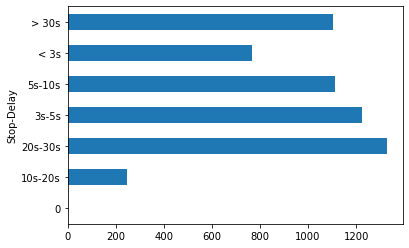

In [8]:
df_stopDelayCount["Tid_Faktisk_Stoppested"].plot.barh()

#Plot for Delay in stops

In [9]:
Linjetype_Per_Fylke

Fylke  Linjetype
Oslo   Ekspress       36
       Lokal        1499
       Natt            3
Viken  Ekspress      157
       Lokal        4242
       Skole          63
Name: Linjetype, dtype: int64

(0.0, 1750.0)

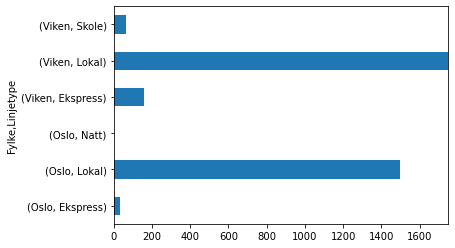

In [10]:
#To have this graph readable, I have limited the x-axis to 1750
#This is because "Viken, Lokal", goes beyond 4000, so the other ones
#Is very hard to see.

ax1 = Linjetype_Per_Fylke.plot.barh()
plt.xlim([0, 1750])

#Plot for line type for each Fylke